<a href="https://colab.research.google.com/github/matheusnalmeida/Analise-de-dados-criminais-Sinesp/blob/main/Trabalho_Pr%C3%A1tico_2_Analisando_dados_criminais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Prático 2 - Analisando dados criminais


## Análise dos dados(Teórica)

- Os dados escolhidos para análise, foram extraídos das soluções SinespJC e Sinesp e possuem dados agrupados por mês de cada ano, 
que apresentam a quantidade de vítimas e ocorrências para cada tipo de crime em cada estado. 
<br><br>
- As colunas que temos para a base de dados de ocorrência são:
1. UF: Estado das ocorrências dos crimes registrados.

2. Tipo do crime: Descrição do respectivo tipo do crime associado.

3. Ano: Ano em que foi registrada a respectiva ocorrência.

4. Mês: Mês em que foi registrada a ocorrência.

5. Ocorrência: Quantidade de ocorrências relacionadas com o mês e ano, para a respectiva UF.
<br><br>

- As colunas que temos para a base de dados de vítimas são:
1. UF: Estado das vítimas dos crimes registrados.

2. Tipo do crime: Descrição do respectivo tipo do crime associado.

3. Ano: Ano em que foi registrada as respectivas vítimas.

4. Mês: Mês em que foram registradas as respectivas vítimas.

5. Vítimas: Quantidade de vítimas relacionadas com o mês e ano, para a respectiva UF.



Em relação a classificação dos dados em qualitativos e quantitativos, temos as seguintes classificações para cada base:

#### <center> Ocorrências

| Variável    |   Tipo   |      Escala  | 
|:--------------|:------------------:|:---------------:|
| UF | Qualitativo | Nominal |
| Tipo Crime | Qualitativo | Nominal |
| Ano | Quantitativo | Ordinal |
| Mês | Qualitativo | Ordinal |
| Ocorrências | Quantitativo Discreto | Racional |

#### <center> Vítimas

| Variável    |   Tipo   |      Escala  | 
|:--------------|:------------------:|:---------------:|
| UF | Qualitativo | Nominal |
| Tipo Crime | Qualitativo | Nominal |
| Ano | Quantitativo | Ordinal |
| Mês | Qualitativo | Ordinal |
| Vítimas | Quantitativo Discreto | Racional |

## Análise dos dados(Prática)

In [16]:
# Imports
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn import preprocessing


In [17]:
xls = pd.ExcelFile('indicadoressegurancapublicauf.xlsx')
dados_ocorrencias = pd.read_excel(xls, 'Ocorrências')
dados_vitimas  = pd.read_excel(xls, 'Vítimas')

In [18]:
dados_ocorrencias.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2015,janeiro,6
1,Acre,Furto de veículo,2015,janeiro,0
2,Acre,Homicídio doloso,2015,janeiro,13
3,Acre,Lesão corporal seguida de morte,2015,janeiro,0
4,Acre,Roubo a instituição financeira,2015,janeiro,0


In [19]:
dados_vitimas.head()

,UF,Tipo Crime,Ano,Mês,Vítimas
0,Acre,Homicídio doloso,2015,janeiro,13
1,Acre,Homicídio doloso,2015,fevereiro,10
2,Acre,Homicídio doloso,2015,março,16
3,Acre,Homicídio doloso,2015,abril,22
4,Acre,Homicídio doloso,2015,maio,15


### Abaixo seguem algumas representações e análise dos dados para a base de ocorrência:

#### Análise da quantidade de ocorrências por ano

- Nesta análise da quantidade de ocorrências por ano, podemos ter uma idéias da distribuição dos dados pelo tempo. Neste caso percebemos um pico no número de ocorrências no ano de 2017 e uma menor quantidade no ano 2021. Esta difereça para o ano de 2021, aconteceu pois existem poucos dados registrados para o ano de 2021. Então podemos desconsiderar o ano de 2021 e considerar o menor ano com ocorrências o ano de 2020.

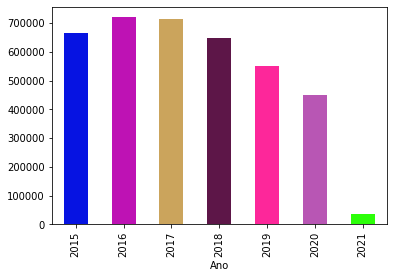

In [20]:
dfocorrencias_por_ano = dados_ocorrencias.groupby(['Ano'])['Ocorrências'].sum()
dfocorrencias_por_ano.plot(kind='bar', stacked='True', color=['#0613e2', '#be12b4', '#cba45c', '#5d1648', '#fd279a', '#b856b4', '#2cff09'])

#### Análise da quantidade de ocorrências por crime

- Nesta análise da quantidade de ocorrências por crime, podemos ter uma idéia do número de ocorrências por crime, ajudando assim a descobrir quais tipos de crimes que possuem a maior quantidade de ocorrências, podendo assim ajudar em possiveis futuras classificações. Nesse caso, os crimes que possuem maior quantidade de ocorrências registradas são os de "Furto de veículo" e "Roubo de veículo", possuindo uma quantidade de ocorrências bem discrepante em relação aos outros crimes.

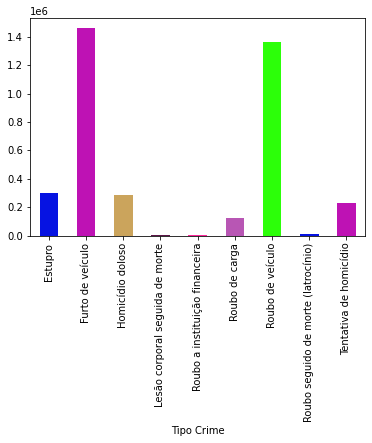

In [21]:
dfocorrencias_por_crime = dados_ocorrencias.groupby(['Tipo Crime'])['Ocorrências'].sum()
dfocorrencias_por_crime.plot(kind='bar', stacked='True', color=['#0613e2', '#be12b4', '#cba45c', '#5d1648', '#fd279a', '#b856b4', '#2cff09'])

#### Análise da quantidade de ocorrências por UF

- Nesta análise da quantidade de ocorrências por UF, podemos ter uma idéia do número de ocorrências por estado, ajudando assim a descobrir quais estados que possuem a maior quantidade de ocorrências, podendo assim ajudar em possiveis futuras classificações. Nesse caso, percebemos uma quantidade de ocorrências discrepantes de ocorrências quando comparamos o estado de "São Paulo" com os outro estados. Logo em segundo estado com maior número de ocorrências, temos o "Rio de Janeiro" e "Minas gerais".

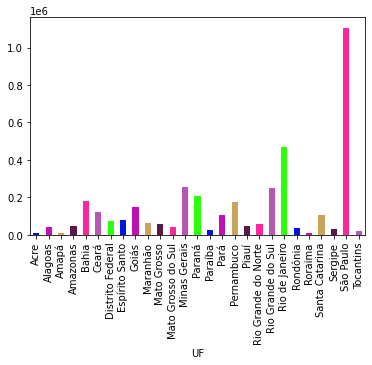

In [22]:
dfocorrencias_por_uf = dados_ocorrencias.groupby(['UF'])['Ocorrências'].sum()
dfocorrencias_por_uf.plot(kind='bar', stacked='True', color=['#0613e2', '#be12b4', '#cba45c', '#5d1648', '#fd279a', '#b856b4', '#2cff09'])

### Abaixo seguem algumas representações e análise dos dados para a base de vítimas:

#### Análise da quantidade de vítimas por ano

- Nesta análise da quantidade de vítimas por ano, podemos ter uma idéias da distribuição dos dados pelo tempo. Neste caso percebemos um pico no número de ocorrências no ano de 2016 e 2017, e uma menor quantidade no ano 2021. Esta difereça para o ano de 2021, assim como para o numero de ocorrências, aconteceu pois existem poucos dados registrados para o ano de 2021. Então podemos desconsiderar o ano de 2021 e considerar o menor ano com vítimas o ano de 2019.

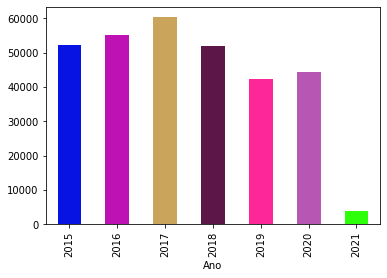

In [23]:
dfvitimas_por_ano = dados_vitimas.groupby(['Ano'])['Vítimas'].sum()
dfvitimas_por_ano.plot(kind='bar', stacked='True', color=['#0613e2', '#be12b4', '#cba45c', '#5d1648', '#fd279a', '#b856b4', '#2cff09'])

#### Análise da quantidade de vítimas por crime

- Nesta análise da quantidade de vítimas por crime, diferente da análise de ocorrências, aqui a quantidade de crimes é bem menor(somente 3), neste caso sendo os crimes agrupados de maneira mais genêrica e não tão especifica. Para estes casos, temos uma quantidade de vítimas bem maior para crimes classificados como "Homicidio doloso", quando comparado com os crimes classificados como "Lesão corporal seguida de morte" ou "Roubo seguido de morte (latrocínio)".

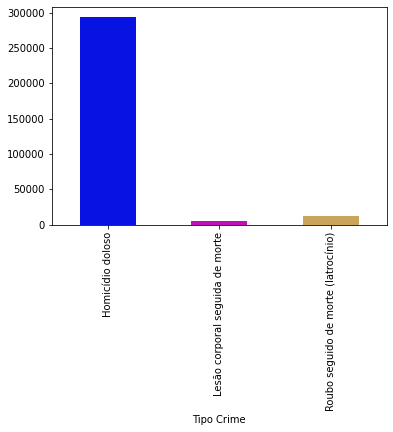

In [24]:
dfvitimas_por_crime = dados_vitimas.groupby(['Tipo Crime'])['Vítimas'].sum()
dfvitimas_por_crime.plot(kind='bar', stacked='True', color=['#0613e2', '#be12b4', '#cba45c', '#5d1648', '#fd279a', '#b856b4', '#2cff09'])

#### Análise da quantidade de vítimas por UF

- Nesta análise da quantidade de vítimas por UF, podemos ter uma idéia do número de vítimas por estado, ajudando assim a descobrir quais estados que possuem a maior quantidade de vítimas, podendo assim ajudar em possiveis futuras classificações. Nesse caso, percebemos a maior quantidade de vítimas para o estado da "Bahia", e o segundo maior o "Rio de Janeiro". Analisando esse resultado com a quantidade de ocorrências por estado, percebemos que apesar de o estado de "São Paulo" possuir a maior quantidade de ocorrências, o mesmo possui uma quantidade relativamente baixa de vítimas quando comparado com os outros estados, o mesmo valendo para o estado da "Bahia", que apesar de possuir um número grande de vítimas, possui uma pequena quantidade de ocorrências registradas.

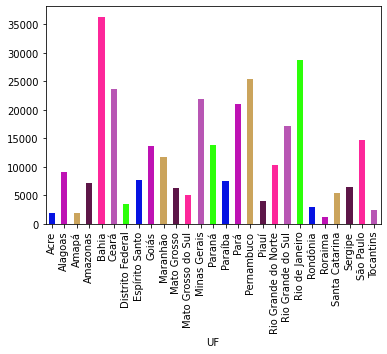

In [25]:
dfvitimas_por_uf = dados_vitimas.groupby(['UF'])['Vítimas'].sum()
dfvitimas_por_uf.plot(kind='bar', stacked='True', color=['#0613e2', '#be12b4', '#cba45c', '#5d1648', '#fd279a', '#b856b4', '#2cff09'])